**Prediction using Decision Tree Algorithm**

Let's import everything we need

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [2]:
data = pd.read_csv('/content/Iris.csv')
data.head(5)



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Visualizing the data


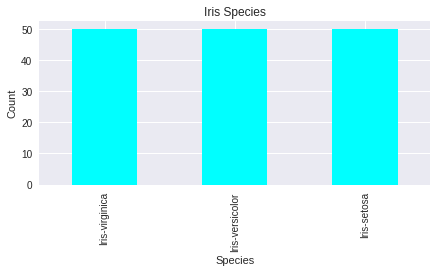

In [3]:
plt.style.use('seaborn') 
plt.figure(figsize = (7,3))
data['Species'].value_counts().plot.bar(color = 'cyan')
plt.title('Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()



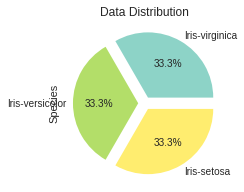

In [4]:
##Let's make a pie chart
plt.style.use('_classic_test_patch') 
plt.figure(figsize = (7,3))
data['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=False,cmap='Set3')
plt.title('Data Distribution')
plt.show()

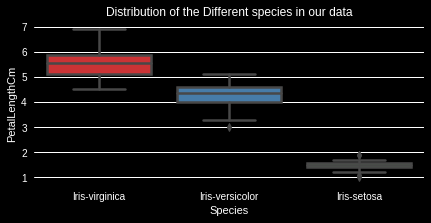

In [5]:

plt.style.use('dark_background') 
plt.figure(figsize = (7,3))
sns.boxplot(x='Species',y='PetalLengthCm',data=data,order=['Iris-virginica','Iris-versicolor','Iris-setosa'],linewidth=2.5,orient='v',dodge=False,palette = 'Set1')
plt.title('Distribution of the Different species in our data')
plt.show()



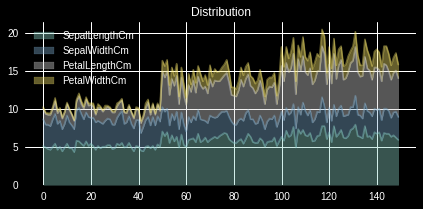

In [6]:
plt.style.use('tableau-colorblind10') 
data.plot.area(y=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],alpha=0.4,cmap = 'Set3',figsize = (7,3))
plt.title('Distribution')
plt.show()

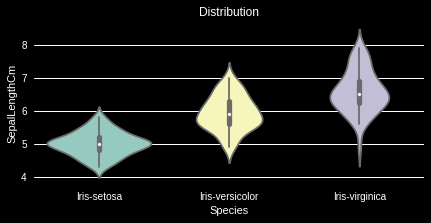

In [7]:
plt.style.use('tableau-colorblind10') 
plt.figure(figsize = (7,3))
sns.violinplot(x='Species',y='SepalLengthCm',data=data,palette = 'Set3')
plt.title('Distribution')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


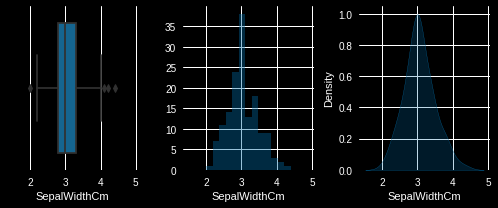

In [8]:
f, axes = plt.subplots(ncols = 3, figsize=(7, 3), sharex=True)
sns.despine(left=True)
sns.boxplot(x = data['SepalWidthCm'], ax=axes[0])
sns.distplot(a=data['SepalWidthCm'], kde=False, ax=axes[1])
sns.kdeplot(data=data['SepalWidthCm'], shade=True, ax=axes[2])
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


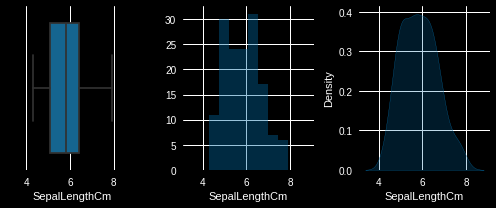

In [9]:
f, axes = plt.subplots(ncols = 3, figsize=(7, 3), sharex=True)
sns.despine(left=True)
sns.boxplot(x = data['SepalLengthCm'], ax=axes[0])
sns.distplot(a=data['SepalLengthCm'], kde=False, ax=axes[1])
sns.kdeplot(data=data['SepalLengthCm'], shade=True, ax=axes[2])
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


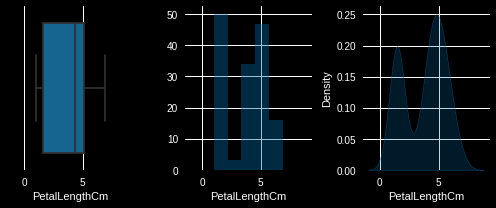

In [10]:
f, axes = plt.subplots(ncols = 3, figsize=(7, 3), sharex=True)
sns.despine(left=True)
sns.boxplot(x = data['PetalLengthCm'], ax=axes[0])
sns.distplot(a=data['PetalLengthCm'], kde=False, ax=axes[1])
sns.kdeplot(data=data['PetalLengthCm'], shade=True, ax=axes[2])
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


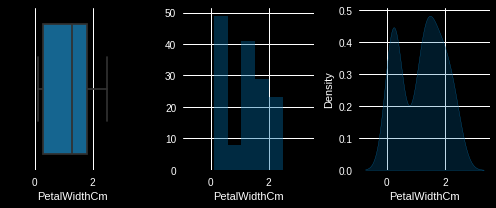

In [11]:
f, axes = plt.subplots(ncols = 3, figsize=(7, 3), sharex=True)
sns.despine(left=True)
sns.boxplot(x = data['PetalWidthCm'], ax=axes[0])
sns.distplot(a=data['PetalWidthCm'], kde=False, ax=axes[1])
sns.kdeplot(data=data['PetalWidthCm'], shade=True, ax=axes[2])
plt.tight_layout()

Let's prepare the data

In [12]:
X_train,X_val,y_train,y_val=train_test_split(data.iloc[:,1:-1],data.iloc[:,-1],test_size=0.3,random_state=69)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)



(105, 4)
(105,)
(45, 4)
(45,)


In [13]:
mymodel=DecisionTreeClassifier()
mymodel.fit(X_train,y_train)
y_pred=mymodel.predict(X_val)



In [14]:
print(accuracy_score(y_pred,y_val))

0.9777777777777777


In [15]:
print(classification_report(y_pred,y_val))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



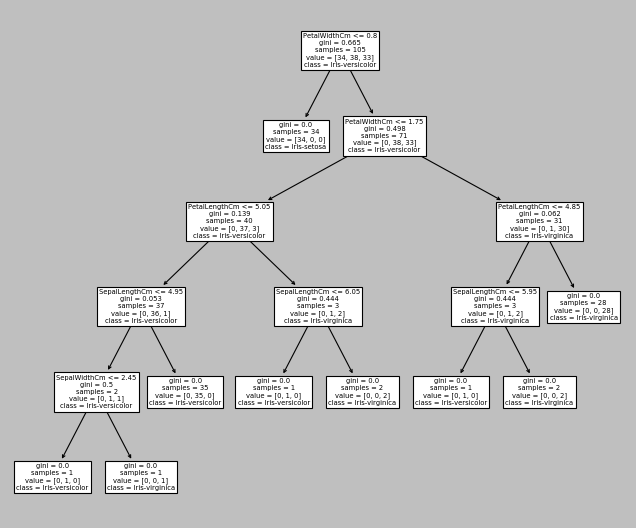

In [16]:
plt.style.use('classic')
from sklearn import tree
fig = plt.figure(figsize=(10,8))
_ = tree.plot_tree(mymodel,
                   feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                   class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],
                   filled=False)



#### Result and Evaluation
we've successfully trained a model that can classify Iris's species by using a decision tree, with an accuracy of 98%